In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt
import imblearn
from sklearn.utils import resample
from keras import layers
import keras
from matplotlib import animation
from keras import models
from keras import optimizers
import random
from matplotlib.animation import FuncAnimation
from keras.metrics import *
import requests

In [20]:
try:
    x=input('Question:' )
    url = "https://google-featured-snippet.p.rapidapi.com/answer"

    querystring = {"query":x}

    headers = {
        "X-RapidAPI-Key": '*API KEY*',
        "X-RapidAPI-Host": "google-featured-snippet.p.rapidapi.com"
    }
    response = requests.request("GET", url, headers=headers, params=querystring)
    r=dict(response.json())
    r.keys()
    print('Has Answer:', r['has_answer'])
    print('Question:', r['question'] )
    print('Answer:', r['raw_text'])
    print(r['related_questions'])
except:
    print('Please Try Again')



Question:what is the use of an ecg
Has Answer: True
Question: what is the use of an ecg
Answer: Featured snippet from the web
An ECG is often used alongside other tests 
to help diagnose and monitor conditions affecting the heart
. It can be used to investigate symptoms of a possible heart problem, such as chest pain, palpitations (suddenly noticeable heartbeats), dizziness and shortness of breath.
Electrocardiogram (ECG) - NHS
https://www.nhs.uk
 › conditions › electrocardiogram
[]


In [22]:
def read_data(data):
    return pd.read_csv(data, header=None)


In [23]:
normal=read_data('C:\\Users\\Emmanuel\\Desktop\\ecl\\ptbdb_normal.csv')
abnormal=read_data('C:\\Users\\Emmanuel\\Desktop\\ecl\\ptbdb_abnormal.csv')
train=read_data('C:\\Users\\Emmanuel\\Desktop\\ecl\\mitbih_train.csv')
test=read_data('C:\\Users\\Emmanuel\\Desktop\\ecl\\mitbih_test.csv')

In [55]:
print(abnormal.isna().sum())
abnormal.head(2)

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
normal.isna().sum()
normal.head(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.0,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


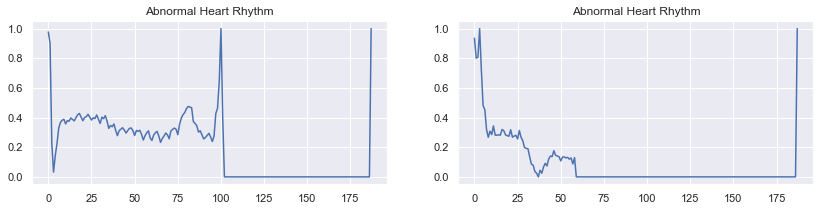

In [46]:
#Lets check the ECG chart of a few abnormal patients
sns.set()
plt.figure(figsize=(14, 3))
plt.subplot(121)
plt.title('Abnormal Heart Rhythm')
plt.plot(abnormal.iloc[3, 0:])
plt.subplot(122)
plt.title('Abnormal Heart Rhythm')
plt.plot(abnormal.iloc[4,0:])

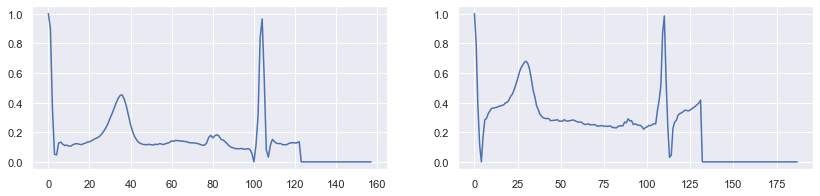

In [47]:
#Plot subplot for normal ECG
plt.figure(figsize=(14, 3))
plt.subplot(1,2,1)
plt.plot(normal.iloc[0, :158])
plt.subplot(1,2,2)
plt.plot(normal.iloc[1,:])

#You can notice even depolarization and polarization in the R curve

[[Text(0, 0, 'Non-Ectopic Beats'),
  Text(0, 1, 'Superventrical Ectopic Beats'),
  Text(0, 2, 'Ventricular Ectopic Beats'),
  Text(0, 3, 'Fusion Beats'),
  Text(0, 4, 'Unknown Beats')]]

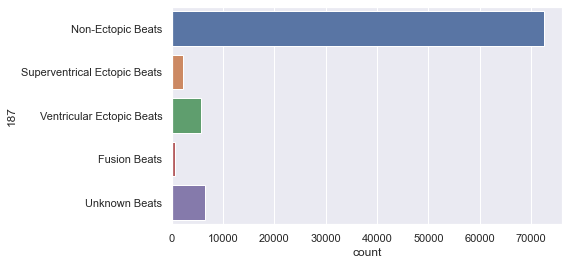

In [236]:
tick=['Non-Ectopic Beats','Superventrical Ectopic Beats','Ventricular Ectopic Beats','Fusion Beats','Unknown Beats']
plt.figure(figsize=(7,4))
sns.set_theme(style="darkgrid")
g=sns.countplot(y=train.iloc[:,-1])
g.set(yticklabels=(tick))
#Its an inbalanced data

In [56]:
Non_Ectopic=train[train.iloc[:,-1]==0]
Superventrical=train[train.iloc[:,-1]==1]
Venticular=train[train.iloc[:,-1]==2]
Fusion=train[train.iloc[:,-1]==3]
Unknown=train[train.iloc[:,-1]==4]


In [52]:
Non_Ectopic.value_counts().sum()

72471

In [57]:
#Non_Ectopic=resample(Non_Ectopic,n_samples=72471, replace=True, random_state=232)
Superventrical=resample(Superventrical,n_samples=72471, replace=True, random_state=232)
Venticular=resample(Venticular,n_samples=72471, replace=True, random_state=223)
Fusion=resample(Fusion,n_samples=72471, replace=True, random_state=223)
Unknown=resample(Unknown,n_samples=72471, replace=True, random_state=212)


[[Text(0, 0, 'Non-Ectopic'),
  Text(0, 1, 'Super-Ventricular Ectopic'),
  Text(0, 2, 'Venticular_Ectopic'),
  Text(0, 3, 'Fusion'),
  Text(0, 4, 'Unknown')]]

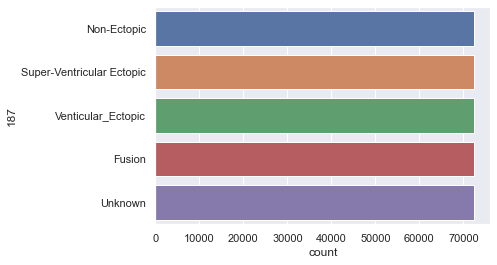

In [55]:
train_data=pd.concat([Non_Ectopic, Superventrical, Venticular, Fusion, Unknown], axis=0)
train_data
tick=['Non-Ectopic', 'Super-Ventricular Ectopic', 'Venticular_Ectopic', 'Fusion', 'Unknown']
train_data.iloc[:,-1].value_counts()
g=sns.countplot(y=train_data.iloc[:,-1])
g.set(yticklabels=(tick))

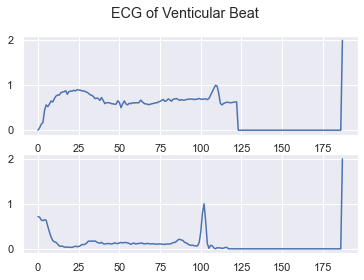

In [68]:
dd=train_data[train_data.iloc[:,-1]==2].sample(1)
fig, ax= plt.subplots(2)
fig.suptitle('ECG of Venticular Beat')
ax[0].plot(dd.iloc[0, :])
dd=train_data[train_data.iloc[:,-1]==2].sample(1)
ax[1].plot(dd.iloc[0, :])


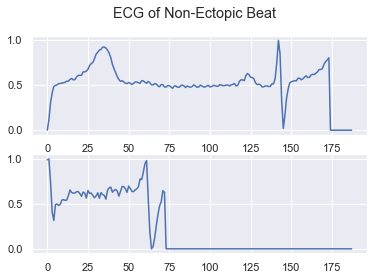

In [69]:
dd=train_data[train_data.iloc[:,-1]==0].sample(1)
fig, ax= plt.subplots(2)
fig.suptitle('ECG of Non-Ectopic Beat')
ax[0].plot(dd.iloc[0, 0:])
dd=train_data[train_data.iloc[:,-1]==0].sample(1)
ax[1].plot(dd.iloc[0, :])


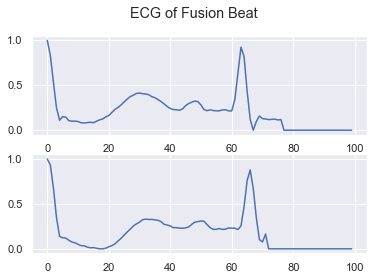

In [63]:
dd=train_data[train_data.iloc[:,-1]==3].sample(1)
fig, ax= plt.subplots(2)
fig.suptitle('ECG of Fusion Beat')
ax[0].plot(dd.iloc[0, 0:100])
dd=train_data[train_data.iloc[:,-1]==3].sample(1)
ax[1].plot(dd.iloc[0, 0:100])


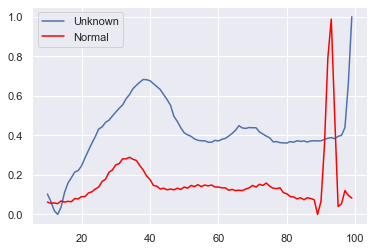

In [374]:
#Comparing Unknown beat with Non-Ectopic beat
dd=train_data[train_data.iloc[:,-1]==4].sample(1)
dr=train_data[train_data.iloc[:,-1]==0].sample(1)
plt.plot(dd.iloc[0, 10:100], label='Unknown')
plt.plot(dr.iloc[0,10:100], color='red', label='Normal')
plt.legend()

In [70]:
train_label=train.iloc[:,-1]
train.drop(187, inplace=True, axis=1)

In [71]:
train_label=preprocessing.LabelEncoder().fit_transform(train_label)
test_label=test.iloc[:,-1]
test_label=test_label.astype('int')
train=np.array(train).reshape(87554, 187, 1)


In [72]:
#ptimizers.SGD
opt=optimizers.Adam(learning_rate=1e-3)
calls=keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=10, restore_best_weights=True, mode='min')
model_checkpoint=keras.callbacks.ModelCheckpoint(monitor='loss',mode='min',filepath='C:\\Users\\Emmanuel\\Downloads\\Model_checkpoint' ,save_best_only=True, save_weights_only=True, patience=10)

In [73]:
model=models.Sequential()
model.add(layers.Conv1D(32,7, activation='relu', strides=2))
model.add(layers.MaxPool1D(7))
model.add(layers.Conv1D(32, 7, activation='relu', strides=2))
model.add(layers.GRU(64, activation='relu', recurrent_dropout=0.2, dropout=0.2, return_sequences=True))
model.add(layers.GRU(64, activation='relu', recurrent_dropout=0.2, dropout=0.2, return_sequences=False))
model.add(layers.Dense(512))
model.add(layers.Dense(5, activation='softmax'))

In [74]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history=model.fit(train, train_label, epochs=17, batch_size=100, callbacks=[model_checkpoint], verbose=1)

Epoch 1/17
876/876 [==============================] - 120s 118ms/step - loss: 0.4038 - accuracy: 0.8851
Epoch 2/17
876/876 [==============================] - 157s 180ms/step - loss: 0.2103 - accuracy: 0.9397
Epoch 3/17
876/876 [==============================] - 127s 145ms/step - loss: 0.1662 - accuracy: 0.9534
Epoch 4/17
876/876 [==============================] - 95s 108ms/step - loss: 0.1449 - accuracy: 0.9602
Epoch 5/17
876/876 [==============================] - 96s 109ms/step - loss: 0.1348 - accuracy: 0.9628
Epoch 6/17
876/876 [==============================] - 92s 105ms/step - loss: 0.1246 - accuracy: 0.9657
Epoch 7/17
876/876 [==============================] - 124s 142ms/step - loss: 0.1166 - accuracy: 0.9684
Epoch 8/17
876/876 [==============================] - 95s 109ms/step - loss: 0.1116 - accuracy: 0.9694
Epoch 9/17
876/876 [==============================] - 121s 138ms/step - loss: 0.1070 - accuracy: 0.9703
Epoch 10/17
876/876 [==============================] - 95s 109ms/ste

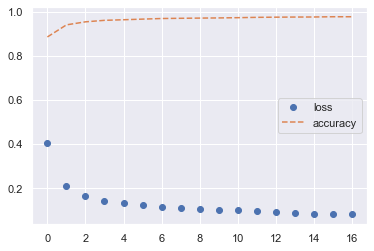

In [75]:

sns.set()
histo=history.history
plt.plot(histo['loss'], 'o',label='loss')
plt.plot(histo['accuracy'], '--', label='accuracy')
plt.legend()


In [76]:
model.evaluate(test, test_label)

685/685 [==============================] - 17s 21ms/step - loss: 0.0876 - accuracy: 0.9773


[0.08761881291866302, 0.9773433208465576]

In [77]:
model.save('best_weight')

INFO:tensorflow:Assets written to: best_weight\assets


INFO:tensorflow:Assets written to: best_weight\assets


In [14]:
pred=model.predict(test)

685/685 [==============================] - 7s 9ms/step
